![](files/images/EscUpmPolit_p.gif "UPM")

## Imports

In [29]:
import pandas as pd
import csv
import numpy as np
import pickle


## Reading data

In [30]:
dtype_list=pickle.load(open('type/train.pkl','rb'))
df=pd.read_csv('dataset/train_data_balance.csv',dtype=dtype_list)
df_original=df.copy()

In [31]:
pd.set_option('display.max_columns', None)
df

,label,uid,task_id,adv_id,creat_type_cd,adv_prim_id,dev_id,inter_type_cd,slot_id,spread_app_id,tags,app_first_class,app_second_class,age,city,city_rank,device_name,device_size,career,gender,net_type,residence,his_app_size,his_on_shelf_time,app_score,emui_dev,list_time,device_price,up_life_duration,up_membership_grade,membership_life_duration,consume_purchase,communication_onlinerate,communication_avgonline_30d,indu_name,pt_d
0,1,1218553,5596,4147,6,206,64,5,18,22,39,4,17,5,121,3,57,193,4,2,2,37,4,3,2,14,13,2,-1,-1,-1,2,6^7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^22^23,11,36,5
1,0,1252579,5372,3899,7,109,29,5,12,86,37,4,21,5,-55,3,54,141,3,2,2,34,4,3,2,12,9,3,-1,-1,-1,2,1^2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18^1...,12,17,4
2,1,2061138,3747,4461,7,207,17,5,17,13,37,4,21,6,-86,3,38,162,9,2,2,46,4,2,2,20,4,4,20,1,-1,2,0^1^2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18...,13,17,1
3,0,1827641,5382,1250,6,113,60,2,21,78,23,2,23,6,-123,3,65,141,9,2,2,43,-1,-1,1,20,10,2,20,-1,-1,2,0^1^2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18...,12,24,6
4,1,1564262,2368,4081,7,183,60,5,17,86,37,2,21,5,-62,3,45,141,4,2,2,42,-1,-1,1,20,8,5,20,-1,-1,2,8^9^10^11^12^13^14^15^16^17^18^19^20^21^22^23,10,24,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,1,1462643,2672,1368,7,205,67,4,17,32,32,4,29,4,-63,5,65,141,4,2,3,20,15,3,2,14,10,2,-1,-1,-1,2,-1,4,51,3
1999996,0,1174582,1147,2931,6,107,15,5,18,46,39,4,17,5,90,3,66,193,4,2,2,40,6,3,2,14,14,2,18,-1,-1,5,0^1^2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18...,13,36,7
1999997,0,1303705,2168,3731,7,125,37,4,17,44,40,4,25,6,34,4,32,141,4,2,2,45,9,3,2,20,4,5,-1,-1,-1,2,7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^22^23,10,17,4
1999998,1,1860619,5268,4551,7,183,60,5,12,86,37,2,21,2,97,3,82,117,4,2,2,34,-1,-1,1,20,9,3,18,-1,-1,2,3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18^19^20...,11,24,6


In [32]:
df.shape

(2000000, 36)

## Features Study

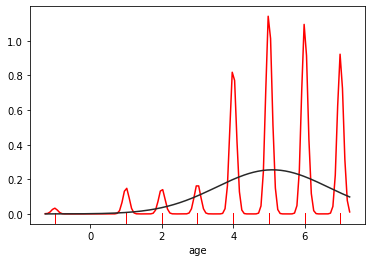

In [33]:
from scipy.stats import norm
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.distplot(df['age'], hist=False, color='r', rug=True, fit=norm)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000198E8BE4EC8>,
      dtype=object)

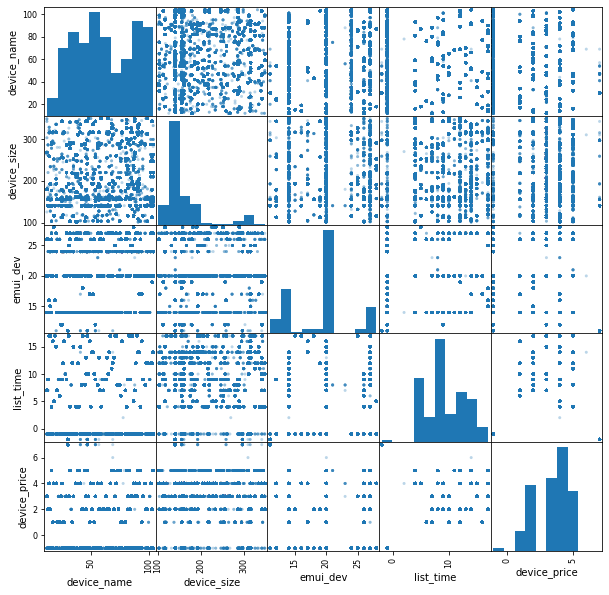

In [34]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[['device_name', 'device_size','emui_dev', 'list_time','device_price']],
    alpha=0.3, figsize=(10,10))

In [56]:
pd.crosstab(df['city'], columns='count').sort_values(['count'], ascending=False).head(10)


col_0,count
city,
-49,86393
-75,83245
-63,58430
110,55820
19,43314
121,42483
-62,38926
-25,36578
114,34677


In [114]:
df[['city', 'label']].groupby(['city']).mean().sort_values(['label'], ascending=False).head(10)

,label
city,
7,1.000000
31,0.710181
27,0.657143
52,0.627119
-64,0.598039
-13,0.594374
35,0.594356
-67,0.594046
72,0.585678


In [59]:
pd.crosstab(df['city_rank'], columns='count').sort_values(['count'], ascending=False).head(10)


col_0,count
city_rank,
3,960765
5,647702
4,362814
2,28719


In [113]:
df[['city_rank', 'label']].groupby(['city_rank']).mean().sort_values(['label'], ascending=False).head(10)

,label
city_rank,
2,0.697657
3,0.521373
4,0.489278
5,0.465538


In [37]:
pd.crosstab(df['residence'], columns='count').sort_values(['count'], ascending=False).head(10)

col_0,count
residence,
20,262265
34,179588
12,135481
37,105441
21,99493
46,97866
42,86796
32,86393
14,79656


In [115]:
df[['residence', 'label']].groupby(['residence']).mean().sort_values(['label'], ascending=False).head(10)

,label
residence,
22,1.000000
11,0.838652
36,0.623397
25,0.550000
27,0.542582
43,0.539152
38,0.530317
30,0.530153
13,0.526134


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000198982E6988>,
      dtype=object)

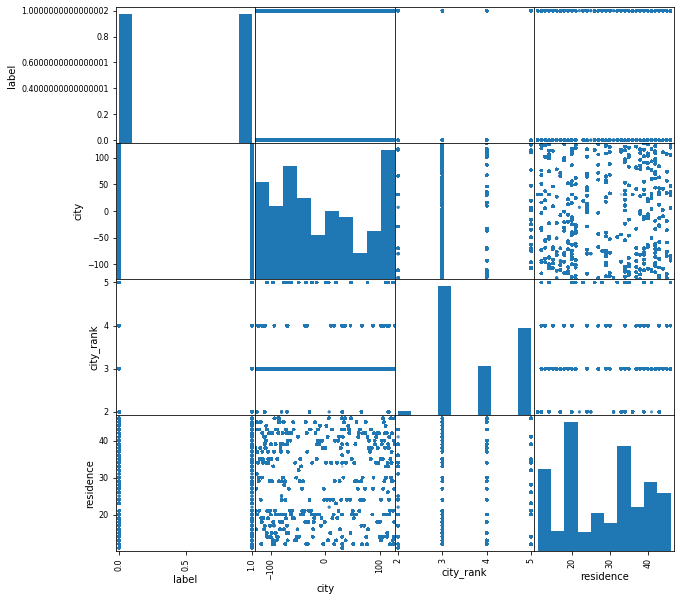

In [38]:
scatter_matrix(df[['label', 'city','city_rank', 'residence']],
    alpha=0.3, figsize=(10,10))

In [39]:
pd.crosstab(df['age'], columns='count').sort_values(['count'], ascending=False).head(20)

col_0,count
age,
5,517052
6,482114
7,395426
4,381333
3,77623
1,66936
2,65348
-1,14168


In [116]:
df[['age', 'label']].groupby(['age']).mean().sort_values(['label'], ascending=False).head(10)

,label
age,
-1,0.834063
7,0.624663
1,0.621310
2,0.540384
3,0.488863
6,0.481780
4,0.453352
5,0.427764


In [40]:
pd.crosstab(df['gender'], columns='count').sort_values(['count'], ascending=False).head(20)

col_0,count
gender,
2,1520573
4,437675
3,41752


In [117]:
df[['gender', 'label']].groupby(['gender']).mean().sort_values(['label'], ascending=False).head(10)

,label
gender,
3,0.722768
4,0.497904
2,0.494487


In [41]:
pd.crosstab(df['career'], columns='count').sort_values(['count'], ascending=False).head(20)

col_0,count
career,
9,904147
4,778059
5,90384
3,55233
6,54044
7,42355
2,40950
8,30985
10,3843


In [118]:
df[['career', 'label']].groupby(['career']).mean().sort_values(['label'], ascending=False).head(10)

,label
career,
9,0.552698
10,0.516003
6,0.509862
5,0.508364
4,0.451641
8,0.440665
2,0.438217
7,0.433833
3,0.423968


In [42]:
pd.crosstab(df['communication_avgonline_30d'], columns='count').sort_values(['count'], ascending=False).head(20)

col_0,count
communication_avgonline_30d,
11,574873
12,493783
13,366708
10,345645
9,101960
8,43196
7,22926
-1,15147
6,14207


In [119]:
df[['communication_avgonline_30d', 'label']].groupby(['communication_avgonline_30d']).mean().sort_values(['label'], ascending=False).head(10)

,label
communication_avgonline_30d,
-1,0.810127
1,0.711864
2,0.668425
3,0.659216
4,0.620294
5,0.605905
6,0.582952
7,0.569441
8,0.553570


In [43]:
pd.crosstab(df['net_type'], columns='count').sort_values(['count'], ascending=False).head(20)

col_0,count
net_type,
2,1619456
3,370388
4,8192
5,1658
6,306


In [120]:
df[['net_type', 'label']].groupby(['net_type']).mean().sort_values(['label'], ascending=False).head(10)

,label
net_type,
6,0.620915
5,0.527141
4,0.517456
2,0.509763
3,0.456705


In [44]:
pd.crosstab(df['consume_purchase'], columns='count').sort_values(['count'], ascending=False).head(20)

col_0,count
consume_purchase,
2,1764321
5,110214
10,64784
7,22149
3,16901
8,11911
9,5107
6,2951
4,1662


In [121]:
df[['consume_purchase', 'label']].groupby(['consume_purchase']).mean().sort_values(['label'], ascending=False).head(10)

,label
consume_purchase,
2,0.503634
5,0.484303
7,0.483679
10,0.464081
6,0.458150
3,0.454174
9,0.450362
8,0.442532
4,0.405535


In [45]:
pd.crosstab(df['pt_d'], columns='count').sort_values(['count'], ascending=False).head(20)

col_0,count
pt_d,
1,312726
7,290552
6,289014
3,284501
2,277692
4,275789
5,269726


In [122]:
df[['pt_d', 'label']].groupby(['pt_d']).mean().sort_values(['label'], ascending=False).head(10)

,label
pt_d,
1,0.524843
2,0.506918
7,0.504856
6,0.503107
3,0.491105
4,0.489853
5,0.475271


In [46]:
pd.crosstab(df['app_score'], columns='count').sort_values(['count'], ascending=False).head(20)

col_0,count
app_score,
2,1658465
1,341535


In [123]:
df[['app_score', 'label']].groupby(['app_score']).mean().sort_values(['label'], ascending=False).head(10)

,label
app_score,
2,0.528562
1,0.361304


In [74]:
pd.crosstab(df['device_size'], columns='count').sort_values(['count'], ascending=False).head(10)

col_0,count
device_size,
141,1099063
117,202422
193,155796
162,154617
156,148579
310,70128
180,59114
316,26283
297,13638


In [129]:
df[['device_size', 'label']].groupby(['device_size']).mean().sort_values(['label'], ascending=False).head(10)

,label
device_size,
219,1.0
149,1.0
135,1.0
140,1.0
203,1.0
201,1.0
144,1.0
148,1.0
196,1.0


In [77]:
pd.crosstab(df['device_name'], columns='count').sort_values(['count'], ascending=False).head(10)

col_0,count
device_name,
56,147114
38,132001
87,116516
29,106772
65,105627
54,97193
104,81370
32,68334
46,67462


In [127]:
df[['device_name', 'label']].groupby(['device_name']).mean().sort_values(['label'], ascending=False).head(10)

,label
device_name,
100,1.000000
79,1.000000
44,1.000000
27,0.719072
90,0.712541
49,0.689526
17,0.681726
21,0.667083
94,0.661514


In [79]:
pd.crosstab(df['list_time'], columns='count').sort_values(['count'], ascending=False).head(10)

col_0,count
list_time,
9,344209
8,282202
4,267077
12,215206
14,189544
10,162603
7,121277
5,117999
13,89029


In [130]:
df[['list_time', 'label']].groupby(['list_time']).mean().sort_values(['label'], ascending=False).head(10)

,label
list_time,
-1,0.834063
16,0.656623
6,0.648738
-2,0.621341
7,0.586443
13,0.573869
10,0.551816
17,0.540185
15,0.535620


In [81]:
pd.crosstab(df['emui_dev'], columns='count').sort_values(['count'], ascending=False).head(10)

col_0,count
emui_dev,
20,1019541
14,432556
27,145209
12,144557
28,118177
17,42911
19,40053
25,23179
26,16973


In [133]:
df[['emui_dev', 'label']].groupby(['emui_dev']).mean().sort_values(['label'], ascending=False).head(10)

,label
emui_dev,
24,0.728914
11,0.631244
18,0.587818
14,0.567878
15,0.555353
25,0.550326
16,0.541649
20,0.493057
19,0.482985


In [85]:
pd.crosstab(df['device_price'], columns='count').sort_values(['count'], ascending=False).head(10)

col_0,count
device_price,
4,639232
3,446445
2,405387
5,368988
1,124720
-1,14168
7,1059
6,1


In [134]:
df[['device_price', 'label']].groupby(['device_price']).mean().sort_values(['label'], ascending=False).head(10)

,label
device_price,
6,1.000000
-1,0.834063
1,0.640932
7,0.621341
2,0.561069
3,0.520501
5,0.456448
4,0.436990


In [87]:
df.columns

Index(['label', 'uid', 'task_id', 'adv_id', 'creat_type_cd', 'adv_prim_id',
       'dev_id', 'inter_type_cd', 'slot_id', 'spread_app_id', 'tags',
       'app_first_class', 'app_second_class', 'age', 'city', 'city_rank',
       'device_name', 'device_size', 'career', 'gender', 'net_type',
       'residence', 'his_app_size', 'his_on_shelf_time', 'app_score',
       'emui_dev', 'list_time', 'device_price', 'up_life_duration',
       'up_membership_grade', 'membership_life_duration', 'consume_purchase',
       'communication_onlinerate', 'communication_avgonline_30d', 'indu_name',
       'pt_d'],
      dtype='object')

In [88]:
pd.crosstab(df['creat_type_cd'], columns='count').sort_values(['count'], ascending=False).head(10)

col_0,count
creat_type_cd,
7,1435800
6,260228
3,157832
8,73818
5,27662
4,26168
2,12555
9,5937


In [135]:
df[['creat_type_cd', 'label']].groupby(['creat_type_cd']).mean().sort_values(['label'], ascending=False).head(10)

,label
creat_type_cd,
3,0.548045
7,0.522645
2,0.423656
6,0.417891
5,0.413636
8,0.386247
9,0.359946
4,0.264827


In [93]:
pd.crosstab(df['adv_prim_id'], columns='count').sort_values(['count'], ascending=False).head(10)

col_0,count
adv_prim_id,
207,270641
142,174901
156,153271
168,99479
178,86863
183,84113
132,81355
130,75123
210,67799


In [138]:
df[['adv_prim_id', 'label']].groupby(['adv_prim_id']).mean().sort_values(['label'], ascending=False).head(10)

,label
adv_prim_id,
103,0.750378
210,0.734760
183,0.649709
197,0.645161
125,0.640419
175,0.635143
147,0.630815
130,0.628130
207,0.598483


In [96]:
pd.crosstab(df['his_on_shelf_time'], columns='count').sort_values(['count'], ascending=False).head(10)

col_0,count
his_on_shelf_time,
3,1433893
-1,340781
2,225192
1,134


In [139]:
df[['his_on_shelf_time', 'label']].groupby(['his_on_shelf_time']).mean().sort_values(['label'], ascending=False).head(10)

,label
his_on_shelf_time,
2,0.540450
3,0.526590
-1,0.361478
1,0.276119


In [98]:
pd.crosstab(df['his_app_size'], columns='count').sort_values(['count'], ascending=False).head(10)

col_0,count
his_app_size,
4,458293
-1,340781
6,262826
14,184870
5,148494
9,144014
16,84566
13,84547
2,79918


In [140]:
df[['his_app_size', 'label']].groupby(['his_app_size']).mean().sort_values(['label'], ascending=False).head(10)

,label
his_app_size,
16,0.677885
4,0.607736
2,0.583160
17,0.533939
6,0.533094
18,0.506485
14,0.482144
11,0.469476
9,0.455970


In [101]:
pd.crosstab(df['up_life_duration'], columns='count').sort_values(['count'], ascending=False).head(10)

col_0,count
up_life_duration,
20,686370
-1,618562
18,447845
14,78828
16,69242
9,23565
12,22943
11,16236
7,3275


In [143]:
df[['up_life_duration', 'label']].groupby(['up_life_duration']).mean().sort_values(['label'], ascending=False).head(10)

,label
up_life_duration,
2,0.661434
3,0.649603
1,0.648863
4,0.622229
5,0.613481
7,0.609771
8,0.599051
6,0.591862
10,0.576984


In [103]:
pd.crosstab(df['up_membership_grade'], columns='count').sort_values(['count'], ascending=False).head(10)

col_0,count
up_membership_grade,
-1,1781206
1,216675
2,1631
3,488


In [144]:
df[['up_membership_grade', 'label']].groupby(['up_membership_grade']).mean().sort_values(['label'], ascending=False).head(10)

,label
up_membership_grade,
2,0.523605
-1,0.507530
3,0.493852
1,0.437932


In [105]:
pd.crosstab(df['membership_life_duration'], columns='count').sort_values(['count'], ascending=False).head(10)

col_0,count
membership_life_duration,
-1,1996944
18,2710
16,214
14,60
20,19
19,12
15,9
12,7
17,6


In [147]:
df[['membership_life_duration', 'label']].groupby(['membership_life_duration']).mean().sort_values(['label'], ascending=False).head(10)

,label
membership_life_duration,
5,1.000000
6,1.000000
8,1.000000
9,1.000000
17,0.833333
12,0.714286
14,0.616667
11,0.600000
18,0.505904


In [107]:
pd.crosstab(df['uid'], columns='count').sort_values(['count'], ascending=False).head(10)


col_0,count
uid,
1679468,64
1606195,64
1780676,48
1840420,46
1508912,45
1051694,45
1576086,44
1695902,44
1792605,44


In [154]:
df[['uid', 'label']].groupby(['uid']).mean().sort_values(['label'], ascending=False).head(10)

,label
uid,
1618293,1.0
1686748,1.0
1686726,1.0
1686730,1.0
1686731,1.0
1686737,1.0
1686743,1.0
1686744,1.0
1686750,1.0


In [153]:
pd.crosstab(df['task_id'], columns='count').sort_values(['count'], ascending=True).head(10)

col_0,count
task_id,
3642,1
5322,1
2737,1
2428,1
2064,1
2067,1
3532,1
2425,1
2070,1


In [155]:
df[['task_id', 'label']].groupby(['task_id']).mean().sort_values(['label'], ascending=False).head(10)

,label
task_id,
4463,1.0
4443,1.0
2007,1.0
5322,1.0
3714,1.0
1973,1.0
1967,1.0
1965,1.0
1960,1.0


In [111]:
pd.crosstab(df['adv_id'], columns='count').sort_values(['count'], ascending=False).head(10)

col_0,count
adv_id,
3367,34412
6751,34156
6869,32892
6503,26840
5884,21174
5483,19865
5494,19794
6428,17733
2504,17025


In [156]:
df[['adv_id', 'label']].groupby(['adv_id']).mean().sort_values(['label'], ascending=False).head(10)

,label
adv_id,
1450,1.0
6233,1.0
3919,1.0
1937,1.0
3932,1.0
5448,1.0
3938,1.0
3968,1.0
1215,1.0


In [157]:
pd.crosstab(df['dev_id'], columns='count').sort_values(['count'], ascending=False).head(10)


col_0,count
dev_id,
17,405282
60,340781
37,288058
56,222313
29,149893
36,147329
70,73047
30,72529
64,44230


In [162]:
df[['dev_id', 'label']].groupby(['dev_id']).mean().sort_values(['label'], ascending=False).head(10)

,label
dev_id,
34,0.773389
70,0.723384
29,0.634359
30,0.633374
17,0.586811
64,0.541917
27,0.537303
23,0.518519
56,0.497713


In [163]:
pd.crosstab(df['spread_app_id'], columns='count').sort_values(['count'], ascending=False).head(10)

col_0,count
spread_app_id,
13,270641
80,179664
86,167467
78,161596
58,153271
44,135698
50,88135
70,86863
31,80248


In [166]:
df[['spread_app_id', 'label']].groupby(['spread_app_id']).mean().sort_values(['label'], ascending=True).head(10)

,label
spread_app_id,
76,0.219512
36,0.238095
20,0.239661
16,0.262857
43,0.269444
79,0.270756
14,0.276119
77,0.276586
62,0.279174


In [167]:
pd.crosstab(df['tags'], columns='count').sort_values(['count'], ascending=False).head(10)

col_0,count
tags,
37,708160
39,323486
40,314084
41,218857
23,169612
13,54604
18,48643
11,29727
32,19485


In [170]:
df[['tags', 'label']].groupby(['tags']).mean().sort_values(['label'], ascending=False).head(10)

,label
tags,
33,0.572711
37,0.563795
39,0.546583
40,0.528983
13,0.523258
20,0.518519
18,0.461608
41,0.424300
32,0.411701


In [171]:
pd.crosstab(df['app_first_class'], columns='count').sort_values(['count'], ascending=False).head(10)

col_0,count
app_first_class,
4,1650523
2,340781
3,8696


In [172]:
df[['app_first_class', 'label']].groupby(['app_first_class']).mean().sort_values(['label'], ascending=False).head(10)

,label
app_first_class,
4,0.529354
2,0.361478
3,0.356946


In [173]:
pd.crosstab(df['app_second_class'], columns='count').sort_values(['count'], ascending=False).head(10)

col_0,count
app_second_class,
21,719155
25,368688
17,340538
26,219059
23,161596
29,68128
20,29727
28,17530
27,16226


In [175]:
df[['app_second_class', 'label']].groupby(['app_second_class']).mean().sort_values(['label'], ascending=True).head(10)

,label
app_second_class,
12,0.296861
16,0.307013
28,0.312379
20,0.313486
14,0.323656
27,0.332121
13,0.335569
23,0.350559
11,0.351376


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000198FD45DE48>,
      dtype=object)

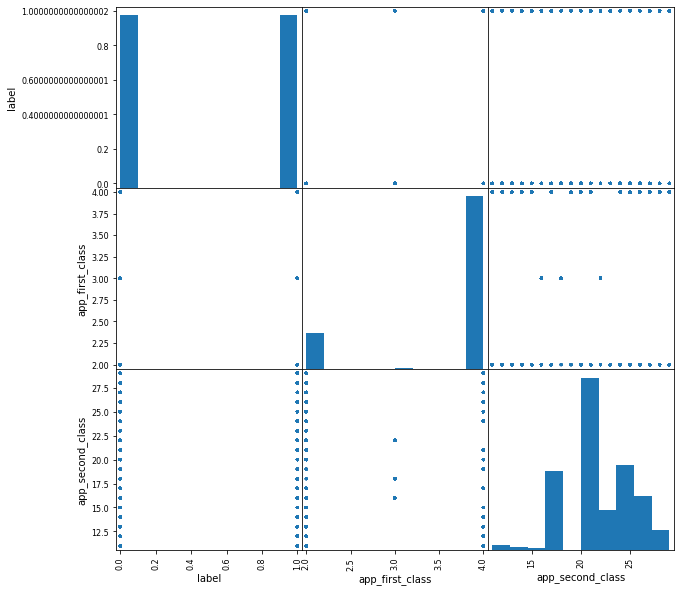

In [176]:
scatter_matrix(df[['label', 'app_first_class','app_second_class']],
    alpha=0.3, figsize=(10,10))

In [177]:
pd.crosstab(df['inter_type_cd'], columns='count').sort_values(['count'], ascending=False).head(10)

col_0,count
inter_type_cd,
5,1589082
4,215936
3,182078
2,12904


In [178]:
df[['inter_type_cd', 'label']].groupby(['inter_type_cd']).mean().sort_values(['label'], ascending=True).head(10)

,label
inter_type_cd,
3,0.325207
5,0.510001
2,0.564089
4,0.569961


In [187]:
pd.crosstab(df['slot_id'], columns='count').sort_values(['count'], ascending=False).head(10)

col_0,count
slot_id,
12,624277
17,374604
16,195099
11,165601
21,149322
18,139550
13,126306
14,91143
19,49321


In [183]:
df[['slot_id', 'label']].groupby(['slot_id']).mean().sort_values(['label'], ascending=False).head(10)

,label
slot_id,
12,0.662743
22,0.531992
18,0.494970
20,0.482968
17,0.466794
16,0.424205
21,0.418331
13,0.408318
11,0.383693


In [181]:
pd.crosstab(df['indu_name'], columns='count').sort_values(['count'], ascending=False).head(10)

col_0,count
indu_name,
17,935523
36,303658
42,166296
24,139612
27,94978
47,81355
14,45785
38,27314
51,17827


In [188]:
df[['indu_name', 'label']].groupby(['indu_name']).mean().sort_values(['label'], ascending=False).head(10)

,label
indu_name,
41,0.689655
27,0.653393
49,0.581717
36,0.556201
17,0.548735
14,0.460719
42,0.443156
15,0.427907
51,0.424805
